# INVESTIGATE A DATASET - IMDB MOVIES DATASET

### **INTRODUCTION:**
In this project of my Data Analysis journey, I am investigating a TMDb movies collection from a database file, which has details of about 10k+ movies, including their details of budget, revenue, release dates, popularity, genre, cast, etc.

The dataset for Analysis is obtained from Kaggle and few insights and plots are created to understand the data better. (https://www.kaggle.com/tmdb/tmdb-movie-metadata)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

imdb = pd.read_csv(r'C:\Users\Nandhitha\Desktop\udacity\project2\movies.csv')
imdb.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
imdb.shape

(10866, 21)

In [9]:
imdb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [10]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [11]:
imdb.duplicated().sum()

1

In [12]:
imdb.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### **WHAT CAN WE SAY ABOUT THE DATASET ?**
* This IMDB Movie dataset contains a total of 10866 rows and 21 columns with relevant information about the movies, its making expenditure, the movie success measures.


* We can see that that there are many unwanted columns in our dataset. So will remove those columns.


* We can also see that our dataset has some missing values and duplicatesd values, So we have to clean and correct them appropriately inorder to proceed with our queries. 


* For the columns 'budget', 'revenue', we are not specified the currency type, So for this dataset we can assume it to be dollars, taking the origin of cast members into consideration. 


* We also note that the 'release_date' column is of object type, so we have to change it to appropriate date format.

### **DATA CLEANING:**
List of data cleaning tasks that has to be done before we proceed to analyse the data:

* Remove columns that are not needed for the analysis, such as the imdb_id, budget, revenue, homepage, keywords, overview. Budget and revenue can be removed as will be using the budget adjusted and revenue adjusted columns.


* Drop duplicated rows, keeping only its first appearance.


* Drop the rows where the budget or revenue adjusted value is equal to 0 or not filled.


* Drop the row that have no genre type mentioned and production companies information.


* Covert the datatype of 'budget_adj' and 'revenue_adj' from float to int.


* Rename the necessary columns to ensure comfortable working with tha data.


* Change the release_date into datetime datatype.

In [13]:
imdb.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview', 'director','tagline'], axis=1, inplace=True)

In [15]:
imdb.drop_duplicates(inplace=True)

In [16]:
imdb.drop(imdb[(imdb.budget_adj == 0)].index, inplace=True)

In [17]:
imdb.dropna(inplace=True, subset=['genres', 'production_companies'])

In [20]:
cols = ['budget_adj', 'revenue_adj']
imdb[cols] = imdb[cols].applymap(np.int64)

In [21]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5032 entries, 0 to 10865
Data columns (total 13 columns):
id                      5032 non-null int64
popularity              5032 non-null float64
original_title          5032 non-null object
cast                    5024 non-null object
runtime                 5032 non-null int64
genres                  5032 non-null object
production_companies    5032 non-null object
release_date            5032 non-null object
vote_count              5032 non-null int64
vote_average            5032 non-null float64
release_year            5032 non-null int64
budget_adj              5032 non-null int64
revenue_adj             5032 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 550.4+ KB


In [22]:
imdb.rename(columns = {'budget_adj' : 'budget_in_$', 'revenue_adj' : 'revenue_in_$'}, inplace = True)

In [24]:
imdb['release_date'] = pd.to_datetime(imdb['release_date'], format='%m/%d/%y')

In [25]:
imdb['runtime'] = imdb['runtime'].replace(0, np.NaN)

In [26]:
imdb.head()

,id,popularity,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_in_$,revenue_in_$
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801


### **QUESTIONS TO START WITH:**
* What is the most popular genre with which movies are made?


* How many movies ended up in profit? And how many were in loss?? 


* Does the budget or the release date/year or the popularity or the runtime or the vote average or the combination of all influence the movie's outcome?

In [79]:
genresList = imdb['genres'].str.split('|')
genres = []
for i in genresList:
    genres.extend(i)

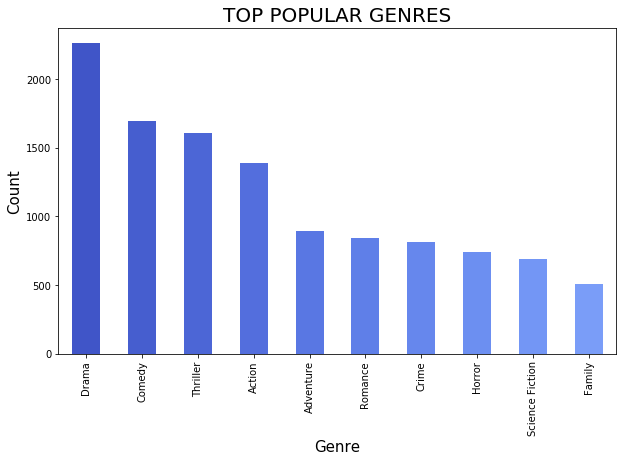

In [80]:
plt.subplots(figsize=(10,6))
pd.Series(genres).value_counts()[:10].plot.bar(color=sns.color_palette('coolwarm',50))
plt.ylabel('Count',size=15)
plt.xlabel('Genre',size=15)
plt.title('TOP POPULAR GENRES',size=20)
plt.show()

In [51]:
imdb['profit_in_$'] = imdb['revenue_in_$'] - imdb['budget_in_$']

In [76]:
loss = (imdb['profit_in_$'] <= 0).sum()

2275

In [77]:
profit = (imdb['profit_in_$'] > 0).sum()

2757

### **FINDINGS:**
* From the graph, we find that 'Drama' is the most popular genre of movie making followed by 'Comedy', 'Thriller', 'Action' genres.


* We have found that 2757 movies were able to make profit from the movie whereas 2275 movies ended up in loss.

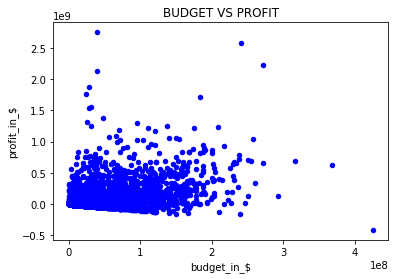

In [94]:
imdb.plot.scatter(x='budget_in_$', y='profit_in_$', title='BUDGET VS PROFIT', color='blue');

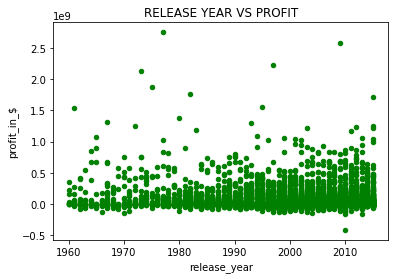

In [96]:
imdb.plot.scatter(x='release_year', y='profit_in_$', title='RELEASE YEAR VS PROFIT',color='green');

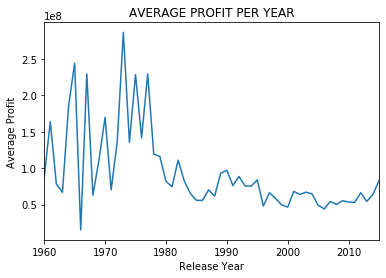

In [88]:
mean_profit_per_year = imdb.groupby('release_year').mean()['profit_in_$']
mean_profit_per_year.plot(title='AVERAGE PROFIT PER YEAR')
plt.xlabel('Release Year')
plt.ylabel('Average Profit');

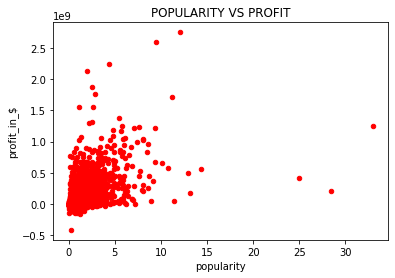

In [99]:
imdb.plot.scatter(x='popularity', y='profit_in_$', title='POPULARITY VS PROFIT', color='red');

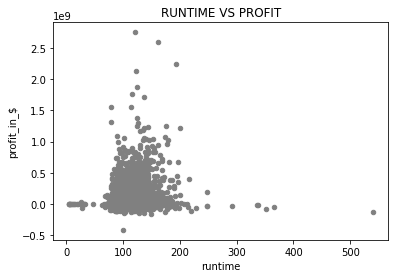

In [100]:
imdb.plot.scatter(x='runtime', y='profit_in_$', title='RUNTIME VS PROFIT', color='grey')

### **FINDINGS:**
* **Budget vs Profit:** The plots shows an idea about the range of the budget that is used to make a film, however the plot does not show any strong correlation between profit and adjusted budget. Ignoring the outliers, we can note that there seems to be a trend that when there is decrease in profit, the budget increase, however, the correlation is weak.


* **Release Year vs Profit:** From the scatter plot, we cannot find any meaningful insights as there are a number of outliers. Hence, the average profit per release year is found and plotted. We can note from this plot that the highest peak turns to be around 1970-1980, so that period of time has seen a lot of profit from movies. After that it seems that the profit faced a fall.


* **Popularity vs Profit:** The plot clearly portrays that popularity has a weak positive correlation towards profit. We also note that there are many outliers in the datset.


* **Runtime vs Profit**: From the scatter plot, we can notice that the average runtime for most of the movies does not exceed beyond 200 minutes.

### **FEW MORE QUESTIONS:**
* Is it possible to visualize the ratio of high budget movies to low budgets?


* What will be the number of latest movies included in the dataset?


* Who might be the most popular or frequently casted actor?


* Which movie made the highest profit? Which movie made the lowest profit out of all?

In [101]:
imdb.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_in_$,revenue_in_$,profit_in_$
count,5032.000000,5032.000000,5031.000000,5032.000000,5032.000000,5032.000000,5.032000e+03,5.032000e+03,5.032000e+03
mean,45154.733903,1.012798,107.492745,419.128975,6.044495,2001.139308,3.771077e+07,1.048937e+08,6.718297e+07
std,72681.461023,1.341126,22.453927,796.367720,0.868036,11.848320,4.219562e+07,1.978682e+08,1.763396e+08
min,5.000000,0.002514,4.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,8637.000000,0.360704,94.000000,39.000000,5.500000,1995.000000,8.818733e+06,3.155750e+03,-8.005555e+06
50%,12538.500000,0.640843,103.000000,130.000000,6.100000,2004.000000,2.370705e+07,3.115261e+07,4.669758e+06
75%,44579.000000,1.177048,117.000000,415.000000,6.600000,2010.000000,5.071437e+07,1.166568e+08,7.144782e+07
max,417859.000000,32.985763,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [107]:
bin_edges = [0,20000000,420000000]
bin_names = ['low budget', 'high budget']
imdb['low_high'] = pd.cut(imdb['budget_in_$'], bin_edges, labels=bin_names)

In [108]:
low_high_ratio = imdb.low_high.value_counts()
low_high_ratio

high budget    2784
low budget     2245
Name: low_high, dtype: int64

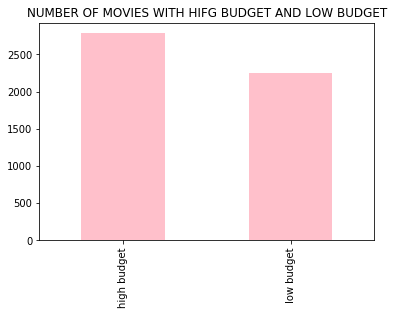

In [110]:
low_high_ratio.plot(kind='bar', color='pink', title='NUMBER OF MOVIES WITH HIFG BUDGET AND LOW BUDGET');

In [122]:
bin_edges = [1960,1995,2004,2015]
bin_names = ['classic old','middle age','latest']
imdb['period_of_movie'] = pd.cut(imdb['release_year'], bin_edges, labels=bin_names)

In [125]:
period_of_movie = imdb.period_of_movie.value_counts()
period_of_movie

latest         2511
classic old    1264
middle age     1248
Name: period_of_movie, dtype: int64

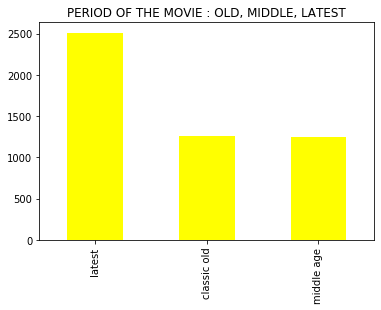

In [115]:
period_of_movie.plot(kind='bar', color='yellow', title='PERIOD OF THE MOVIE : OLD, MIDDLE, LATEST');

### **FINDINGS:**
* Among the movies data, we have found that there are 2278 movies produced at high budget and 2245 movies produced at low budget. 


* We have found that the dataset consists of more number of latest movie information. There are 2511 latest movies, 1248 middle age movies and 1264 classic old movies.

In [127]:
profit_movie = imdb[imdb['profit_in_$'] >= 50000000]
profit_movie.index = range(len(profit_movie))
profit_movie.index = profit_movie.index + 1

imdb_data = profit_movie['genres'].str.cat(sep = '|')
imdb_data = pd.Series(imdb_data.split('|'))

imdb_data = profit_movie['cast'].str.cat(sep = '|')
imdb_data = pd.Series(imdb_data.split('|'))
cast_count = imdb_data.value_counts(ascending = False)

cast_count.head(10)

Tom Cruise            29
Tom Hanks             25
Brad Pitt             25
Robert De Niro        23
Sylvester Stallone    21
Cameron Diaz          21
Denzel Washington     20
Eddie Murphy          20
Jim Carrey            20
Adam Sandler          19
dtype: int64

In [120]:
highest_profit=imdb['profit_in_$'].idxmax()
imdb.loc[highest_profit]

id                                                                     11
popularity                                                        12.0379
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
runtime                                                               121
genres                                   Adventure|Action|Science Fiction
production_companies     Lucasfilm|Twentieth Century Fox Film Corporation
release_date                                          1977-03-20 00:00:00
vote_count                                                           4428
vote_average                                                          7.9
release_year                                                         1977
budget_in_$                                                      39575591
revenue_in_$                                                   2789712242
profit_in_$                           

In [121]:
lowest_profit=imdb['profit_in_$'].idxmin()
imdb.loc[lowest_profit]

id                                                                  46528
popularity                                                        0.25054
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                                                         2010
budget_in_$                                                     425000000
revenue_in_$                                                     11087569
profit_in_$                           

### **FINDINGS:**
* With no surprise, we find that 'Tom Cruise' is the actor who has done his part in more number of movies, followed by the actors 'Tom Hanks' ,'Brad Pitt' and others.


* The movie that yielded the highest profit is found to be 'Star Wars' that has yielded a profit of nearly 2.75 billion casting Mark Hamill, Harrison Ford, Carrie Fisher, Peter and others which was released in the year 1977.


* The movie that yielded the lowest profit is found to be 'The Warrior's Way' that went in loss for nearly 400 billion casting Kate Bosworth, Jang Dong-gun, Geoffrey Rush, Dann and others which was released in the year 2010.

# CONCLUSION:
**1. What is the most popular genre with which movies are made?**

The most popular genre is 'DRAMA' followed by 'COMEDY'.



**2. How many movies ended up in profit? And how many were in loss?**

2757 movies make profit whereas 2275 movies ended in loss.



**3. Does the budget or the release date/year or the popularity or the runtime or the vote average or the combination of all influence the movie's outcome?**

From the plots and visuals, we can infer the below:
    * It is not always true that higher the budget of the movie, the more profit it will make.
    * It also seems to us that popularity does not affect the profit much.
    * The movies released during 1970 and 1980 are noted to contibute more money.
    * Most of the movie duration is less than 200 minutes. Moreover, it is the runtime duration for which the movies made more money.



**4. Is it possible to visualize the ratio of high budget movies to low budgets?**

Yes, after visualization we have found that 2278 movies were produced at high budget and 2245 movies were produced at low budget



**5. What will be the number of latest movies included in the dataset?**

There are 2511 latest movies, 1248 middle age movies and 1264 classic old movies.



**6. Who might be the most popular or frequently casted actor?**

'Tom Cruise' is the actor who has done his part in more number of movies, followed by the actors 'Tom Hanks'.




**7. Which movie made the highest profit? Which movie made the lowest profit out of all?**

Movie with highest profit is found to be 'Star Wars' and movie with lowest profit is found to be 'The Warrior's Way'.


# THANKYOU :)  
## I hope my analysis provided you with some useful insights and understandings!